# Análisis de resultados
Comparación de accuracy de los 4 modelos entrenados.

In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

df_test = pd.read_csv('../datasets/test.csv')
X_test = df_test.drop(columns=['Etiqueta'])
y_test = df_test['Etiqueta']

modelos = {
    'Random Forest': joblib.load('../modelos/modelo_random_forest.pkl'),
    'SVC': joblib.load('../modelos/modelo_svc.pkl'),
    'KNN': joblib.load('../modelos/modelo_knn.pkl'),
    'Logistic Regression': joblib.load('../modelos/modelo_logistic.pkl')
}

resultados = {}
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc
    print(f'\nModelo: {nombre}\n')
    print(classification_report(y_test, y_pred))

pd.DataFrame.from_dict(resultados, orient='index', columns=['Accuracy'])


Modelo: Random Forest

              precision    recall  f1-score   support

  artificial       1.00      1.00      1.00       366
         mix       0.98      0.98      0.98       389
     natural       0.98      0.98      0.98       328
   pantallas       1.00      1.00      1.00       377

    accuracy                           0.99      1460
   macro avg       0.99      0.99      0.99      1460
weighted avg       0.99      0.99      0.99      1460


Modelo: SVC

              precision    recall  f1-score   support

  artificial       0.99      0.99      0.99       366
         mix       0.90      0.93      0.91       389
     natural       0.91      0.87      0.89       328
   pantallas       1.00      1.00      1.00       377

    accuracy                           0.95      1460
   macro avg       0.95      0.95      0.95      1460
weighted avg       0.95      0.95      0.95      1460


Modelo: KNN

              precision    recall  f1-score   support

  artificial       0.99

,Accuracy
Random Forest,0.989726
SVC,0.950685
KNN,0.989041
Logistic Regression,0.944521


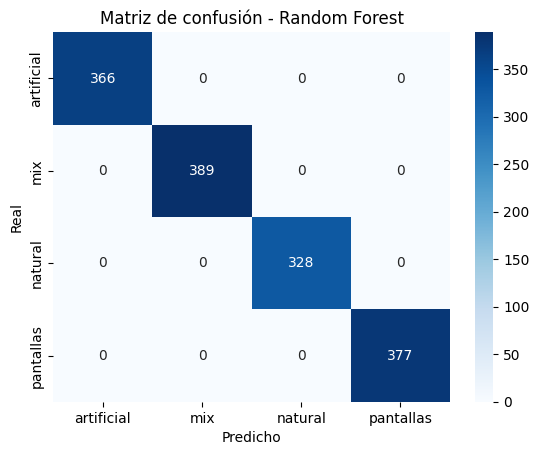

In [3]:
# Matriz de confusión para el mejor modelo
mejor_modelo = max(resultados, key=resultados.get)
y_pred = modelos[mejor_modelo].predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title(f'Matriz de confusión - {mejor_modelo}')
plt.show()